In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [2]:
df=pd.read_csv("../data/retail_sales_dataset.csv")

df.head()

,Order ID,Order Date,Product Name,Category,Quantity,Price,Sales,Profit,State
0,1001,2024-01-03,Wireless Mouse,Electronics,2,25,50,12,California
1,1002,2024-01-04,Cotton T-Shirt,Apparel,3,15,45,10,Texas
2,1003,2024-01-07,Running Shoes,Footwear,1,80,80,18,New York
3,1004,2024-01-11,LED Monitor,Electronics,1,150,150,30,Florida
4,1005,2024-01-14,Jeans,Apparel,2,40,80,22,Illinois


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      20 non-null     int64 
 1   Order Date    20 non-null     object
 2   Product Name  20 non-null     object
 3   Category      20 non-null     object
 4   Quantity      20 non-null     int64 
 5   Price         20 non-null     int64 
 6   Sales         20 non-null     int64 
 7   Profit        20 non-null     int64 
 8   State         20 non-null     object
dtypes: int64(5), object(4)
memory usage: 1.5+ KB


In [4]:
df.describe()

,Order ID,Quantity,Price,Sales,Profit
count,20.00000,20.000000,20.000000,20.00000,20.000000
mean,1010.50000,1.700000,71.600000,81.30000,18.250000
std,5.91608,1.174286,66.634431,59.95709,14.048319
min,1001.00000,1.000000,5.000000,25.00000,5.000000
25%,1005.75000,1.000000,25.000000,40.00000,8.750000
50%,1010.50000,1.000000,47.500000,57.50000,13.500000
75%,1015.25000,2.000000,97.500000,97.50000,22.750000
max,1020.00000,5.000000,250.000000,250.00000,60.000000


In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])

df.isnull().sum()

Order ID        0
Order Date      0
Product Name    0
Category        0
Quantity        0
Price           0
Sales           0
Profit          0
State           0
dtype: int64

In [9]:
df['Month']=df['Order Date'].dt.to_period('M')
df['Year']=df['Order Date'].dt.year

In [11]:
total_sales=df['Sales'].sum()
total_profits=df['Profit'].sum()
total_orders=df.shape[0]
avg_order_value=df['Sales'].mean()

total_sales, total_profits, total_orders, avg_order_value

(np.int64(1626), np.int64(365), 20, np.float64(81.3))

In [12]:
category_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Electronics    380
Furniture      370
Home Goods     341
Apparel        325
Accessories    130
Footwear        80
Name: Sales, dtype: int64

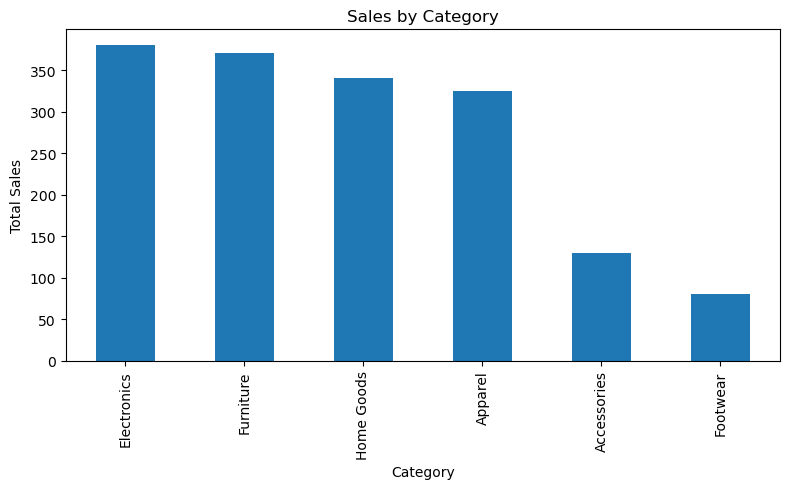

In [13]:
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("../images/sales_by_category.png")
plt.show()


In [14]:
monthly_sales=df.groupby('Month')['Sales'].sum()
monthly_sales

Month
2024-01    405
2024-02    280
2024-03    941
Freq: M, Name: Sales, dtype: int64

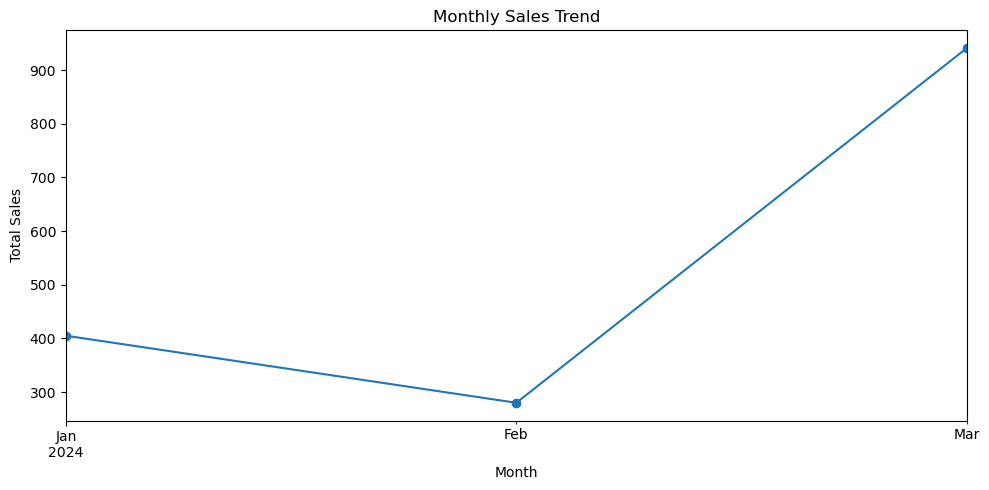

In [15]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("../images/monthly_sales_trend.png")
plt.show()


In [16]:
top_products=df.groupby('Product Name')['Sales'].sum().nlargest(10)
top_products

Product Name
Standing Desk        250
Air Purifier         200
LED Monitor          150
Office Chair         120
Winter Jacket        120
Sports Watch          90
Jeans                 80
Running Shoes         80
Coffee Maker          70
Bluetooth Speaker     60
Name: Sales, dtype: int64

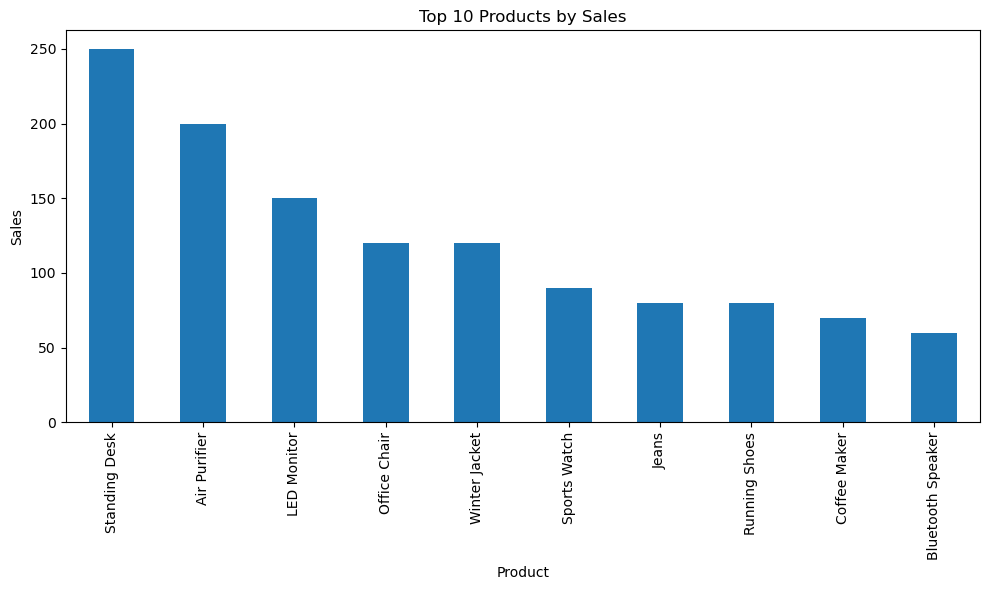

In [17]:
plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("../images/top_products.png")
plt.show()


In [18]:
state_sales=df.groupby('State')['Sales'].sum().sort_values(ascending=False)
state_sales

State
Illinois      330
Florida       220
Washington    200
California    165
Texas         141
New York      135
Nevada        120
New Jersey    120
Ohio           90
Arizona        40
Georgia        35
Colorado       30
Name: Sales, dtype: int64

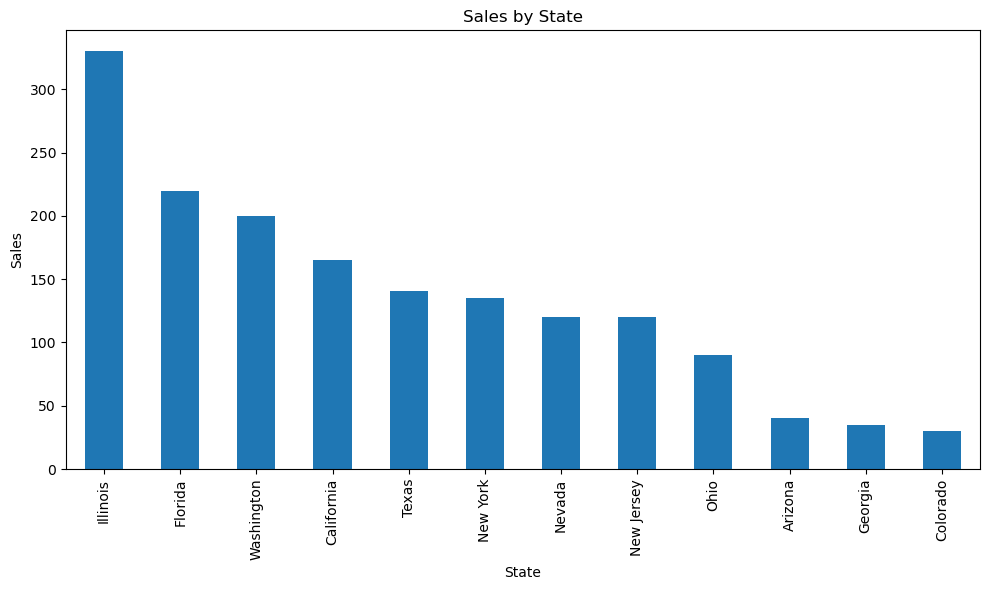

In [19]:
plt.figure(figsize=(10,6))
state_sales.plot(kind='bar')
plt.title("Sales by State")
plt.xlabel("State")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("../images/sales_by_state.png")
plt.show()
